In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(0,2,20)
print(x)


[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]


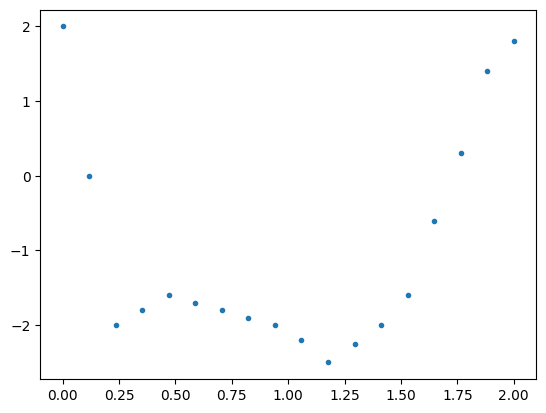

In [15]:
x = np.linspace(0,2,20)
y = np.array([2, 0 , -2, -1.8 ,-1.6,-1.7,-1.8,-1.9,-2,-2.2, -2.5,-2.25,-2,-1.6,-0.6,0.3,1.4,1.8])
plt.plot(np.linspace(0,2,len(y)),y, ".")
plt.show()

[  -2.83782437    1.00452823   83.85939096 -346.28453152  630.66075759
 -612.43673376  319.64906078  -81.83056647    6.01154462]


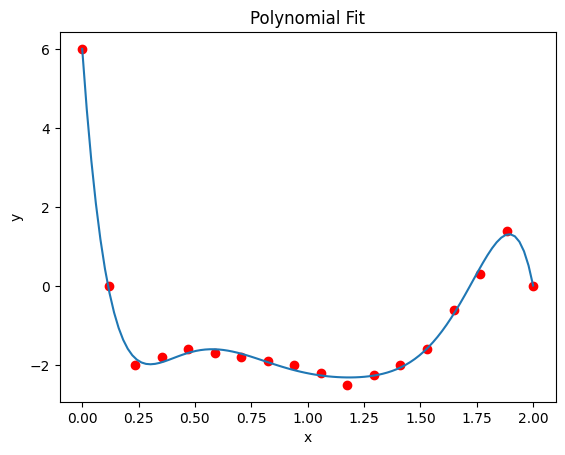

In [34]:
# Given data
x = np.linspace(0, 2, 18)  # Adjusted to match the y array size
y = np.array([6, 0, -2, -1.8, -1.6, -1.7, -1.8, -1.9, -2, -2.2, -2.5, -2.25, -2, -1.6, -0.6, 0.3, 1.4, 0])

# Fit a polynomial (adjust degree as needed)
degree = 8  # You can experiment with different values
coeffs = np.polyfit(x, y, degree)
print(coeffs)
poly = np.poly1d(coeffs)

# Generate smooth x values for plotting
x_smooth = np.linspace(0, 2, 100)
y_smooth = poly(x_smooth)

# Plot the data and polynomial fit
plt.scatter(x, y, color='red', label="Data Points")
plt.plot(x_smooth, y_smooth, label=f"Degree {degree} Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.title("Polynomial Fit")
plt.show()

In [51]:
# def polynomial_function(coeffs):
#     """
#     Returns a polynomial function given coefficients.
    
#     :param coeffs: List of coefficients [a_n, a_(n-1), ..., a_1, a_0]
#     :return: A function f(x) that computes the polynomial at x
#     """
#     p = np.poly1d(coeffs)
#     return lambda x: p(x)
    
# coeffs = [8,7,6,5,4,3,2,1]  
# f = polynomial_function(coeffs)

# print(np.poly1d(coeffs))

def objective(coeffs):
    x = np.linspace(0, 2, 18)  # Adjusted to match the y array size
    y = np.array([6, 0, -2, -1.8, -1.6, -1.7, -1.8, -1.9, -2, -2.2, -2.5, -2.25, -2, -1.6, -0.6, 0.3, 1.4, 0])
    
    # Fit a polynomial (adjust degree as needed)
    degree = 8  # You can experiment with different values
    coeff_obj = np.polyfit(x, y, degree)
    # print(len(coeff_obj))

    objective_array = np.abs(coeff_obj-coeffs)
    
    return np.sum(objective_array)

print(objective(np.array([0,1,2,3,4,5,6,7,8])))

bounds = [-1000,1000]

2082.551849064824


In [80]:
from cmaes import CMA

bound = [-1000, 1000]
bounds = np.tile(bound,(9,1))

# print(bounds)

# def objective(coeffs):
#     x = np.linspace(0, 2, 18)  # Adjusted to match the y array size
#     y = np.array([6, 0, -2, -1.8, -1.6, -1.7, -1.8, -1.9, -2, -2.2, -2.5, -2.25, -2, -1.6, -0.6, 0.3, 1.4, 0])
    
#     # Fit a polynomial (adjust degree as needed)
#     degree = 8  # You can experiment with different values
#     coeff_obj = np.polyfit(x, y, degree)
#     # print(len(coeff_obj))

#     objective_array = np.abs(coeff_obj-coeffs)
    
#     return np.sum(objective_array)

def objective(coeffs):
    x = np.linspace(0, 2, 18)  # Adjusted to match the y array size
    y = np.array([6, 0, -2, -1.8, -1.6, -1.7, -1.8, -1.9, -2, -2.2, -2.5, -2.25, -2, -1.6, -0.6, 0.3, 1.4, 0])
    
    # Fit a polynomial (degree = 8)
    degree = 8
    coeff_obj = np.polyfit(x, y, degree)
    
    # Calculate the difference between the fitted coefficients and the candidate coefficients
    objective_array = np.abs(coeff_obj - coeffs)

    
    # Return the sum of the objective and the penalty
    return np.sum(objective_array) #+ 1000*(np.abs(np.polyval(coeffs, 2)-0))


x = np.linspace(0, 2, 18)  # Adjusted to match the y array size
y = np.array([6, 0, -2, -1.8, -1.6, -1.7, -1.8, -1.9, -2, -2.2, -2.5, -2.25, -2, -1.6, -0.6, 0.3, 1.4, 0])

# Fit a polynomial (degree = 8)
degree = 8
mean = np.polyfit(x, y, degree)


def cmaes_polynomial_coefficients_evolution(mean, sigma, popsize, Ngen, bounds):
    optimizer = CMA(mean=mean, sigma=sigma, population_size=popsize, bounds=bounds)

    # Array to store the evolution of the mean values over generations
    mean_evolution = np.zeros((Ngen, len(mean)))  # Store mean coefficients over generations
    # print(mean_evolution)

    for generation in range(Ngen): 
        solutions = []

        for i in range(popsize):
            x = optimizer.ask()  # Get a new candidate solution (polynomial coefficients)
            # coeffs[i] = x  # Store the normalized coefficients
            objective_value = objective(x)  
            solutions.append((x, objective_value))

        optimizer.tell(solutions)
        
        mean_evolution[generation] = optimizer.mean  # Store the current mean of the population
    return mean_evolution

solution = cmaes_polynomial_coefficients_evolution(mean, 500, 16, 50, bounds)
print(solution[-1])

[  -5.81063172   -2.18167089   84.00842661 -347.09655695  629.3927688
 -611.39337353  319.70185176  -81.22695173    7.88662907]


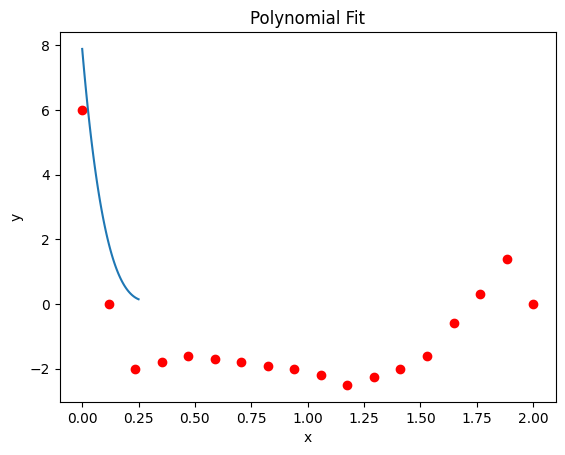

In [81]:
coeffs = solution[-1]
poly = np.poly1d(coeffs)

# Generate smooth x values for plotting
x_smooth = np.linspace(0, 0.25, 100)
y_smooth = poly(x_smooth)

# Plot the data and polynomial fit
plt.scatter(x, y, color='red', label="Data Points")
plt.plot(x_smooth, y_smooth, label=f"Degree {degree} Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
# plt.legend()
plt.title("Polynomial Fit")
plt.show()